In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [16]:
DATA_PATH = '../data/training/final/travel_insight.csv'
VAL_DATA_PATH = '../data/validation/final/travel_insight.csv'
travel = pd.read_csv(DATA_PATH)
travel_val = pd.read_csv(VAL_DATA_PATH)
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_MISSION_CHECK,activity_payment_sum,activity_payment_count,activity_store_count,activity_history_rows,...,TRAVEL_MISSION_CHECK_CD_12,TRAVEL_MISSION_CHECK_CD_13,TRAVEL_MISSION_CHECK_CD_21,TRAVEL_MISSION_CHECK_CD_22,TRAVEL_MISSION_CHECK_CD_23,TRAVEL_MISSION_CHECK_CD_24,TRAVEL_MISSION_CHECK_CD_25,TRAVEL_MISSION_CHECK_CD_26,TRAVEL_MISSION_CHECK_CD_27,TRAVEL_MISSION_CHECK_CD_28
0,a_a014262,1;11;2;22;,2022-10-29,2022-10-30,자가용,2;1;22,183249,6,6,5,...,0,0,0,1,0,0,0,0,0,0
1,a_a006728,21;24;5;22;26;27;,2022-10-10,2022-10-11,자가용,6;1;22,68600,3,3,10,...,0,0,0,1,0,0,0,0,0,0
2,a_a015745,1;2;6;,2022-10-31,2022-11-03,대중교통 등,13;3;28,57100,7,6,22,...,0,1,0,0,0,0,0,0,0,1
3,a_a010544,21;22;24;26;,2022-11-01,2022-11-02,자가용,1;22;26,89700,5,4,10,...,0,0,0,1,0,0,0,1,0,0
4,a_a012058,1;4;10;12;21;22;26;,2022-11-05,2022-11-06,대중교통 등,1;21;22,155520,4,4,8,...,0,0,1,1,0,0,0,0,0,0


In [17]:
# 학습에 사용할 피처값 선언
features_for_training = [
    'activity_payment_sum',
    'activity_payment_count',
    'activity_store_count',
    'activity_history_rows',
    'activity_type_unique',
    'lodging_payment_sum',
    'lodging_payment_count',
    'lodging_store_count',
    # 'IS_FAILED_TRIP',
    'visit_trip_days',
    'visit_move_cnt',
    'AGE_GRP',
    'EDU_NM',
    'MARR_STTS',
    'FAMILY_MEMB',
    'JOB_NM',
    'INCOME',
    'HOUSE_INCOME',
    'TRAVEL_TERM',
    'TRAVEL_NUM',
    'TRAVEL_LIKE_SIDO_1',
    # 'TRAVEL_LIKE_SGG_1',
    'TRAVEL_LIKE_SIDO_2',
    # 'TRAVEL_LIKE_SGG_2',
    'TRAVEL_LIKE_SIDO_3',
    # 'TRAVEL_LIKE_SGG_3',
    'TRAVEL_MOTIVE_1',
    'TRAVEL_MOTIVE_2',
    'TRAVEL_MOTIVE_3',
    'TRAVEL_COMPANIONS_NUM',
    'TRAVEL_STATUS_RESIDENCE_CODE',
    'TRAVEL_STATUS_DESTINATION_CODE'
]

In [18]:
# 데이터 선언
X = travel[features_for_training]
y = travel['IS_FAILED_TRIP']

In [19]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3
)

In [20]:
# # SMOTE
# smote = SMOTE(random_state=42)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [21]:
# 레이블에서 0, 1의 비율 계산
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# 모델 호출
xgb_clf = XGBClassifier(
    n_estimators=100,       # 결정트리 기반 모델에만 가능
    # max_depth=3,
    learning_rate=5e-6,
    random_state=42,
    scale_pos_weight=ratio
)

In [22]:
# 학습
# xgb_clf.fit(X_train_over, y_train_over)
xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
# 예측
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

In [24]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
# accuracy score, MSE, R2 score
print("="*5+"Train data"+"="*70)
print(f'Acc : {accuracy_score(y_true=y_train, y_pred=y_pred_train)}')
print(f'MSE : {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'R2 : {r2_score(y_true=y_train, y_pred=y_pred_train)}')
print("="*5+"Confusion Matrix"+"="*63)
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))
print("="*5+"Classification_report"+"="*58)
print(classification_report(y_true=y_train, y_pred=y_pred_train))
print("="*5+"Test data"+"="*70)
print(f'Acc : {accuracy_score(y_true=y_test, y_pred=y_pred_test)}')
print(f'MSE : {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')
print(f'R2 : {r2_score(y_true=y_test, y_pred=y_pred_test)}')
print("="*5+"Confusion Matrix"+"="*63)
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("="*5+"Classification_report"+"="*58)
print(classification_report(y_true=y_test, y_pred=y_pred_test))

=====Train data======================================================================
Acc : 0.6052631578947368
MSE : 0.39473684210526316
R2 : -0.911558917264536
=====Confusion Matrix===============================================================
[[1499 1032]
 [ 378  663]]
=====Classification_report==========================================================
              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68      2531
         1.0       0.39      0.64      0.48      1041

    accuracy                           0.61      3572
   macro avg       0.59      0.61      0.58      3572
weighted avg       0.68      0.61      0.62      3572

=====Test data======================================================================
Acc : 0.5369039843239712
MSE : 0.46309601567602876
R2 : -1.2799486660309438
=====Confusion Matrix===============================================================
[[617 480]
 [229 205]]
=====Classification_report====================

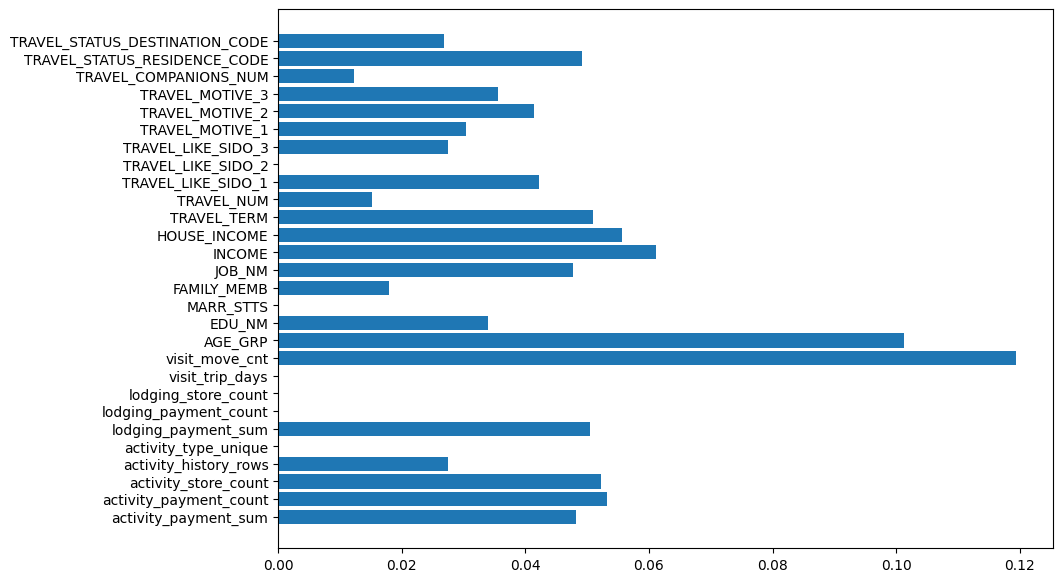

In [36]:
import matplotlib.pyplot as plt

# 피처 중요도 시각화
plt.figure(figsize=(10,7))
plt.barh(X.columns, xgb_clf.feature_importances_)
plt.show()

이상민

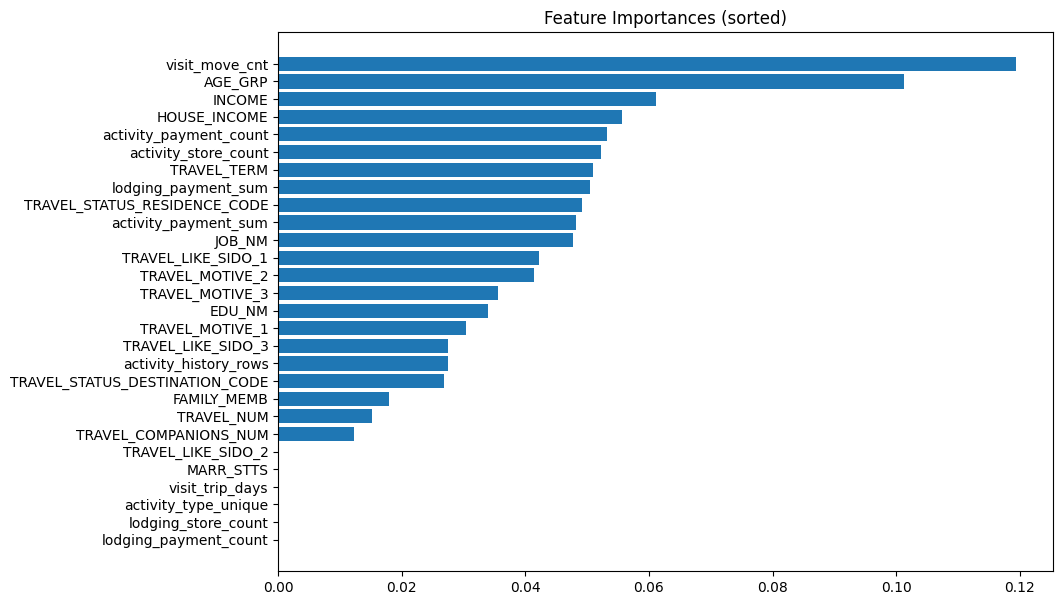

In [37]:
plt.figure(figsize=(10,7))
sorted_idx = xgb_clf.feature_importances_.argsort()[::-1]

plt.barh(X.columns[sorted_idx], xgb_clf.feature_importances_[sorted_idx])
plt.title("Feature Importances (sorted)")
plt.gca().invert_yaxis()
plt.show()

In [31]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [29]:
# 1. 예측 확률과 클래스
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

In [33]:
# 2. 기본 평가 지표
print("Accuracy:", (y_test == y_pred).mean())
print("F1-macro:", f1_score(y_test, y_pred, average="macro"))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5369039843239712
F1-macro: 0.5007494652097744
ROC-AUC: 0.5139813651811181

Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.56      0.64      1097
         1.0       0.30      0.47      0.37       434

    accuracy                           0.54      1531
   macro avg       0.51      0.52      0.50      1531
weighted avg       0.61      0.54      0.56      1531

